In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

In [3]:
dfs_15 = np.array([pd.read_csv(f'../plots/ablations/runs_ablations_15_{i}.csv').Value.to_numpy() for i in range(1,6)])
dfs_1 = np.array([pd.read_csv(f'../plots/ablations/runs_ablations_1_{i}.csv').Value.to_numpy() for i in range(1,6)])
dfs_nml_15 = np.array([pd.read_csv(f'../plots/ablations/nml15_{i}_None.csv').Value.to_numpy() for i in range(1,6)])

In [4]:
X = np.linspace(0,3000,1000)
dfs_15_mean = dfs_15.mean(axis=0)
dfs_15_std = dfs_15.std(axis=0)

dfs_1_mean = dfs_1.mean(axis=0)
dfs_1_std = dfs_1.std(axis=0)

dfs_nml_15_mean = dfs_nml_15.mean(axis=0)
dfs_nml_15_std = dfs_nml_15.std(axis=0)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


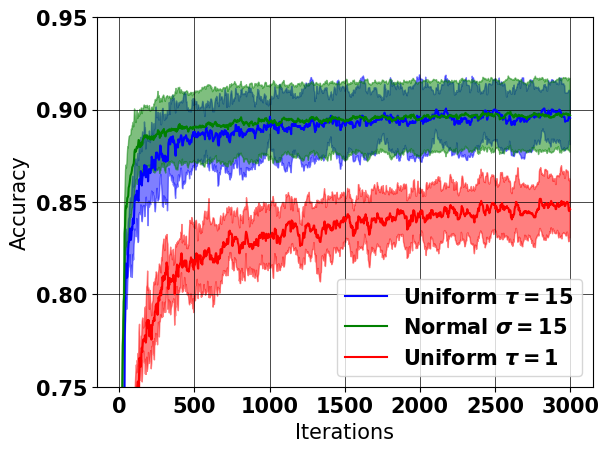

In [5]:
y_ticks = np.arange(0, 1.1, 0.05)
plt.yticks(y_ticks)

plt.plot(X, dfs_15_mean, "b", label=r'Uniform $\tau = 15$')
plt.fill_between(X, dfs_15_mean - dfs_15_std, dfs_15_mean + dfs_15_std, color="blue", alpha=0.5)

plt.plot(X, dfs_nml_15_mean, "g", label=r'Normal $\sigma = 15$')
plt.fill_between(X, dfs_nml_15_mean - dfs_nml_15_std, dfs_nml_15_mean + dfs_nml_15_std, color="green", alpha=0.5)


plt.plot(X, dfs_1_mean, "r", label=r'Uniform $\tau = 1$')
plt.fill_between(X, dfs_1_mean - dfs_1_std, dfs_1_mean + dfs_1_std, color="red", alpha=0.5)

plt.ylim(0.75,0.95)

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend(loc="lower right")

## Linear Eval Full Data

In [6]:
df_tempo = pd.read_csv('../plots/runs_proper_tp_None.csv')
df_bl = pd.read_csv('../plots/runs_proper_bl_None.csv')

In [7]:
X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_bl = df_bl['Value']

In [8]:
X.shape

(1000,)

In [9]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

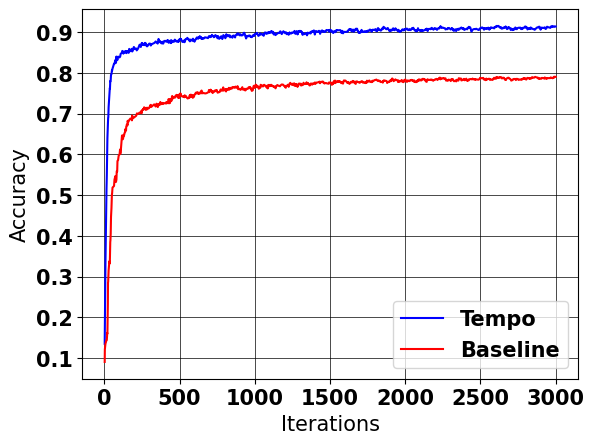

In [10]:
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)

plt.plot(X, Y_tempo, 'b', label='Tempo')
plt.plot(X, Y_bl, 'r', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [11]:
f"max. Baseline: {Y_bl.max()}, max. Tempo: {Y_tempo.max()}"

'max. Baseline: 0.7902777791023254, max. Tempo: 0.915000021457672'

In [12]:
Y_tempo.max() - Y_bl.max()

0.12472224235534657

## Linear Eval Few-Shot

In [13]:
dfs_bl = [pd.read_csv(f'../plots/linear_eval/baseline/linear_eval_baseline_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]
dfs_tp = [pd.read_csv(f'../plots/linear_eval/tempo/linear_eval_tempo_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]

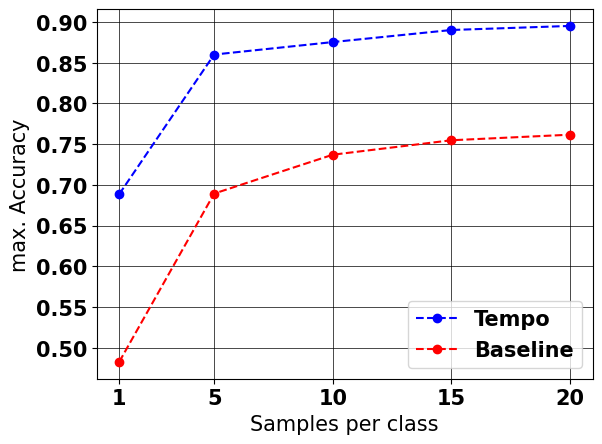

In [14]:
X = [1,5,10,15,20]
plt.xticks(X)
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.plot(X, dfs_tp, '--bo', label='Tempo')
plt.plot(X, dfs_bl, '--ro', label='Baseline')

plt.xlabel('Samples per class')
plt.ylabel('max. Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [15]:
dfs_bl, dfs_tp, np.array(dfs_tp) - np.array(dfs_bl)

([0.4824999868869781,
  0.6892499923706055,
  0.7369999885559082,
  0.7547500133514404,
  0.7615833282470703],
 [0.6884999871253967,
  0.8600000143051147,
  0.875333309173584,
  0.8901666402816772,
  0.8951666951179504],
 array([0.206     , 0.17075002, 0.13833332, 0.13541663, 0.13358337]))

## Semi-Supervised Full

In [16]:
df_tempo = pd.read_csv('../plots/semi_sup_eval2/tempo/semi_sup_eval_tempo_2_None.csv')
df_bl = pd.read_csv('../plots/semi_sup_eval2/baseline/semi_sup_eval_baseline_2_None.csv')

X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_bl = df_bl['Value']

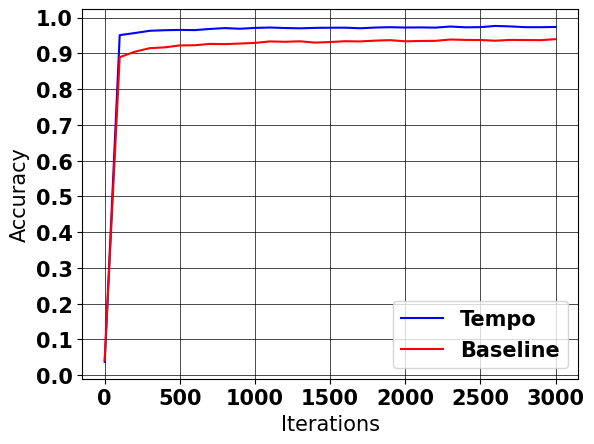

In [17]:
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)

plt.plot(X, Y_tempo, 'b', label='Tempo')
plt.plot(X, Y_bl, 'r', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [18]:
f"max. Baseline: {Y_bl.max()}, max. Tempo: {Y_tempo.max()}"

'max. Baseline: 0.9395833611488342, max. Tempo: 0.9765833616256714'

In [19]:
Y_tempo.max() - Y_bl.max()

0.03700000047683716

'max. Baseline: 0.9144444465637208, max. Tempo: 0.9683333039283752'

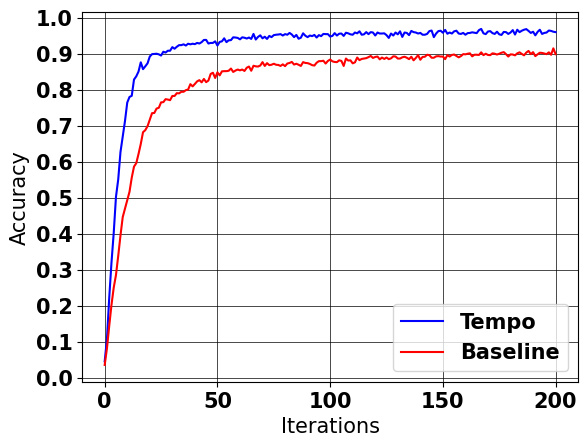

In [20]:
df_tempo = pd.read_csv('../plots/sse_1_None.csv')
df_bl = pd.read_csv('../plots/sse_bl_None.csv')

X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_bl = df_bl['Value']

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)

plt.plot(X, Y_tempo, 'b', label='Tempo')
plt.plot(X, Y_bl, 'r', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

f"max. Baseline: {Y_bl.max()}, max. Tempo: {Y_tempo.max()}"

## Semi-Supervised Few-Shot

In [21]:
#TODO: add 1 for both
dfs_bl = [pd.read_csv(f'../plots/semi_sup_eval2/baseline/semi_sup_eval_baseline_2_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]
dfs_tp = [pd.read_csv(f'../plots/semi_sup_eval2/tempo/semi_sup_eval_tempo_2_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]

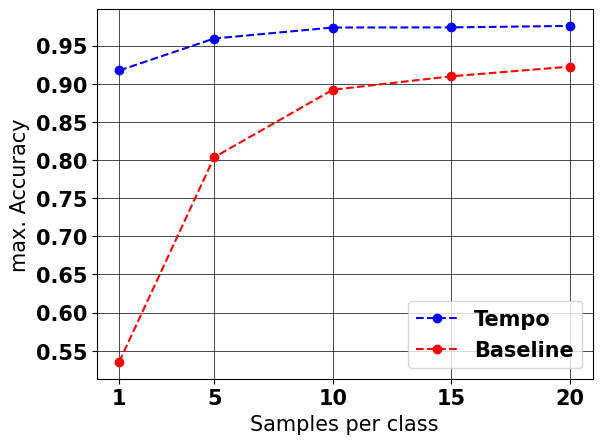

In [22]:
X = [1,5,10,15,20]
plt.xticks(X)
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.plot(X, dfs_tp, '--bo', label='Tempo')
plt.plot(X, dfs_bl, '--ro', label='Baseline')

plt.xlabel('Samples per class')
plt.ylabel('max. Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [23]:
dfs_bl, dfs_tp, np.array(dfs_tp) - np.array(dfs_bl)

([0.5352500081062317,
  0.8034999966621399,
  0.8920833468437195,
  0.9097499847412108,
  0.9224166870117188],
 [0.9173333048820496,
  0.9592499732971193,
  0.9736666679382324,
  0.9738333225250244,
  0.9757500290870668],
 array([0.3820833 , 0.15574998, 0.08158332, 0.06408334, 0.05333334]))

## Ablations - ImageNet Pretraining 

In [24]:
df_tempo = pd.read_csv('../plots/runs_proper_tp_None.csv')
df_bl = pd.read_csv('../plots/runs_proper_bl_None.csv')
df_scratch = pd.read_csv('../plots/scratch.csv')

'max. Baseline: 0.7902777791023254, max. Tempo: 0.915000021457672'

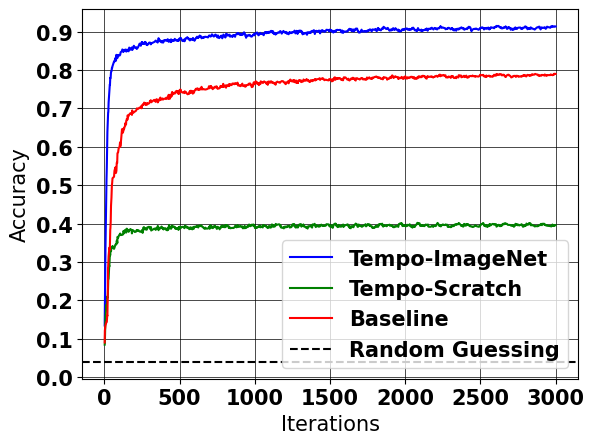

In [25]:
X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_scratch = df_scratch['Value']
Y_bl = df_bl['Value']

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)

plt.plot(X, Y_tempo, 'b', label='Tempo-ImageNet')
plt.plot(X, Y_scratch, 'g', label='Tempo-Scratch')
plt.plot(X, Y_bl, 'r', label='Baseline')

plt.axhline(y = 0.04, color = 'black', linestyle = '--', label="Random Guessing")

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

f"max. Baseline: {Y_bl.max()}, max. Tempo: {Y_tempo.max()}"

In [26]:
dfs_tp = np.array([pd.read_csv(f'../plots/bbox/output_tempo_final_{i}.csv').Value.to_numpy() for i in range(1,6)])
dfs_bl = np.array([pd.read_csv(f'../plots/bbox/output_baseline_final_{i}.csv').Value.to_numpy() for i in range(1,6)])

In [27]:
X = np.linspace(1_000,15_000,15)
X

array([ 1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
        9000., 10000., 11000., 12000., 13000., 14000., 15000.])

In [28]:
dfs_tp_mean = dfs_tp.mean(axis=0)
dfs_tp_std = dfs_tp.std(axis=0)

dfs_bl_mean = dfs_bl.mean(axis=0)
dfs_bl_std = dfs_bl.std(axis=0)

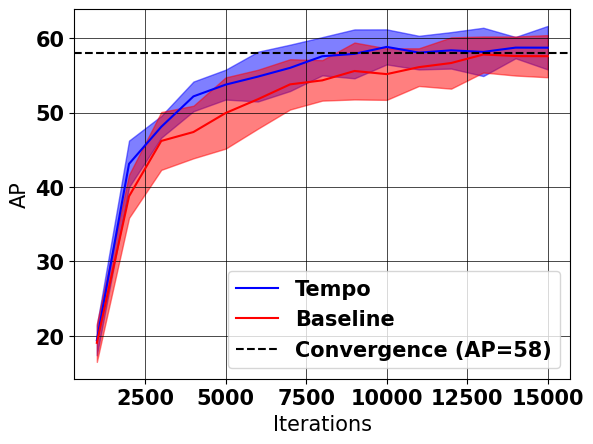

In [29]:
# y_ticks = np.arange(0, 1.1, 0.05)
# plt.yticks(y_ticks)

plt.plot(X, dfs_tp_mean, "b", label=r'Tempo')
plt.fill_between(X, dfs_tp_mean - dfs_tp_std, dfs_tp_mean + dfs_tp_std, color="blue", alpha=0.5)

plt.plot(X, dfs_bl_mean, "r", label=r'Baseline')
plt.fill_between(X, dfs_bl_mean - dfs_bl_std, dfs_bl_mean + dfs_bl_std, color="red", alpha=0.5)

plt.xlabel('Iterations')
plt.ylabel('AP')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.axhline(y = 58, color = 'black', linestyle = '--' , label="Convergence (AP=58)")

plt.legend(loc="lower right")

In [30]:
dfs_tp_mean.max(), dfs_bl_mean.max()

(58.82530517578125, 57.80138244628906)

In [31]:
dfs_tp_mean, dfs_bl_mean

(array([19.36849442, 43.10027924, 48.07889328, 52.17261429, 53.75264435,
        54.82998276, 56.00730133, 57.56916046, 57.89009247, 58.82530518,
        58.05572433, 58.3624794 , 58.15309525, 58.72771072, 58.72069092]),
 array([19.04066105, 38.73893509, 46.18043137, 47.38083344, 49.93690109,
        51.78706818, 53.78806076, 54.32434235, 55.58601303, 55.16600647,
        56.10297241, 56.65848312, 57.80138245, 57.59523773, 57.57724304]))

In [32]:
dfs_tp = np.array([pd.read_csv(f'../plots/segm/output_tempo_final_{i}.csv').Value.to_numpy() for i in range(1,6)])
dfs_bl = np.array([pd.read_csv(f'../plots/segm/output_baseline_final_{i}.csv').Value.to_numpy() for i in range(1,6)])

In [33]:
dfs_tp_mean = dfs_tp.mean(axis=0)
dfs_tp_std = dfs_tp.std(axis=0)

dfs_bl_mean = dfs_bl.mean(axis=0)
dfs_bl_std = dfs_bl.std(axis=0)

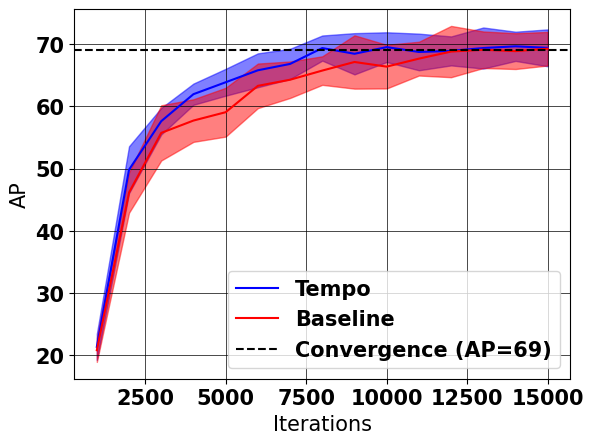

In [34]:
plt.plot(X, dfs_tp_mean, "b", label=r'Tempo')
plt.fill_between(X, dfs_tp_mean - dfs_tp_std, dfs_tp_mean + dfs_tp_std, color="blue", alpha=0.5)

plt.plot(X, dfs_bl_mean, "r", label=r'Baseline')
plt.fill_between(X, dfs_bl_mean - dfs_bl_std, dfs_bl_mean + dfs_bl_std, color="red", alpha=0.5)

plt.xlabel('Iterations')
plt.ylabel('AP')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.axhline(y = 69, color = 'black', linestyle = '--', label="Convergence (AP=69)")

plt.legend(loc="lower right")

In [35]:
dfs_tp_mean.max(), dfs_bl_mean.max()

(69.62474670410157, 69.23941040039062)

In [36]:
dfs_tp_mean, dfs_bl_mean

(array([21.35862923, 49.80399704, 57.60027618, 61.93728256, 63.85206985,
        65.7737114 , 66.79660721, 69.34319305, 68.42801208, 69.49411011,
        68.71852875, 68.88560791, 69.35067673, 69.6247467 , 69.37911377]),
 array([20.81864738, 46.1337326 , 55.72050247, 57.69996643, 59.04301529,
        63.27597809, 64.25785294, 65.72870865, 67.10849533, 66.36048126,
        67.64494781, 68.78237305, 69.0730835 , 68.85266724, 69.2394104 ]))

## Layers Eval

In [37]:
df_bl = pd.read_csv(f'../plots/layers/runs_lin_layers_bl.csv').Value.to_numpy()
df_tp = pd.read_csv(f'../plots/layers/runs_lin_layers_tp.csv').Value.to_numpy()

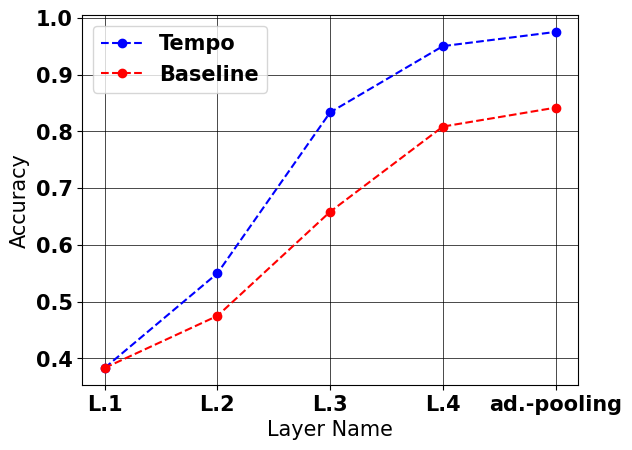

In [38]:
fig, ax = plt.subplots()

ax.plot(df_tp, '--bo', label='Tempo')
ax.plot(df_bl, '--ro', label='Baseline')

plt.xlabel('Layer Name')
plt.ylabel('Accuracy')
ax.grid(color='black', linestyle='-', linewidth=0.5)

ax.set_xticks([0,1,2,3,4])

fig.canvas.draw()
ax.set_xticklabels(['L.1', 'L.2', 'L.3', 'L.4', 'ad.-pooling'])

ax.legend()